# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Abhinav Sharma

EID: ass2575

Name:

EID:

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


We know the general derivative formula for SGD:
$$w^{\tau + 1}  = w^{\tau} - \eta\frac{\partial(t - y)^2}{\partial(w)}$$ where $w$ is weight, $\tau$ is iteration number, and $\eta$ is learning rate.
 and we evaluated the SGD equations as :
$$w_0^{\tau + 1}  = w_0^{\tau} - (-\eta)(t - y)X$$ <br>
Momentum adds in a fraction of the previously computed gradient into the current calculation thereby we have :

$$w_0^{\tau + 1}  = w_0^{\tau} - (\gamma\nabla_{prev} + \nabla_{curr})X$$ <br> which equates out to the easily codable form :
$$ w_0^{\tau + 1}  = w_0^{\tau} - (\gamma\nabla_{prev} + (-\eta)(t - y))X $$ <br> wherein we can call $\nabla_{prev}$ recursively in the code

In [22]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0 # used in momentum
        #gradient_prev=0

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama*self.cache + (1-self.gama)*(gradient**2)
        self.coef = self.coef - ((gradient * self.learning_rate)/(np.sqrt(np.mean(self.cache))+ self.eps))

    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        #Update
        self.cache = (-1*gradient) - (self.cache * self.mu)
        self.coef = self.coef + (self.cache * self.learning_rate)
        

        # if (self.cache == np.zeros(self.coef.shape)):
        #     self.cache += (gradient)
        # else:
        #     self.cache *= self.mu
        #     self.cache += (1-self.gama)*(gradient**2)

    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        #Initialize mse and coef lists
        mse = []
        coefs = []
        if (update_rule=='sgd_momentum'):
            gradient = None
        
        #Generate feature space
        X = self.get_features(X)
        #For each epoch, for all rows
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = y - self.linearPredict(X)
                error = error[i]
                # Compute gradient
                gradient =  (-1 * ((error * X[i,:]) - (self.regularization * self.coef)) )
                

               
                # Update weights
                if (update_rule=='sgd_momentum'):
                    self.sgd_momentum(gradient)
                elif(update_rule=='RMSprop'):
                    self.rmsprop(gradient)
                else :
                    print('Incorrect argument')
                    pass

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            #print(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')


    def get_features(self, X):
       x = np.zeros((X.shape[0], num_of_coefs))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''
       return np.dot(X_features, self.coef)

In [18]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

Using Momentum : 

Best case is with learning rate :  0.001  ,regularization :  0  and #epochs :  30
Next best case is with learning rate :  0.0001  ,regularization :  0  and #epochs :  30


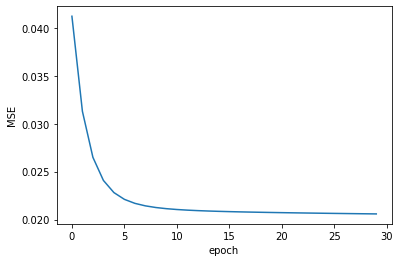

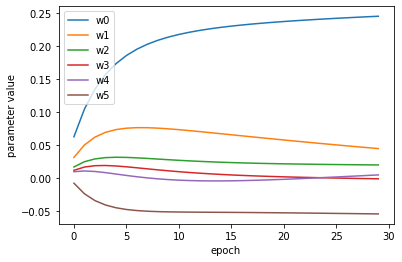

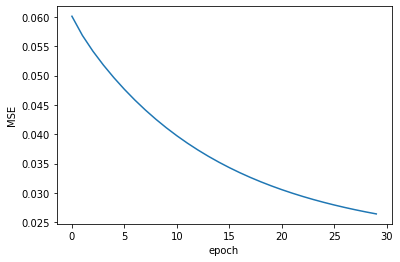

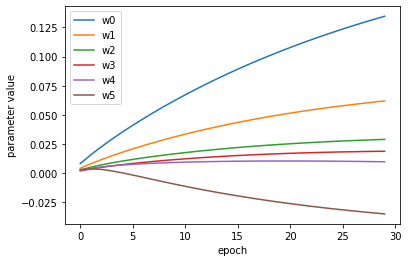

In [24]:
print('Using Momentum : \n')
lowest_mse = np.Inf
best_reg = None
best_rate = None
second_lowest_mse = np.Inf
second_best_reg = None
second_best_rate = None

for rate in learning_rate:
  for lamb in regularization:
    lr = LinearRegression(rate, lamb, n_epochs)
    lr.fit(X, y)
    if lr.lowest_mse < lowest_mse:
      # first we will store previous best
      second_best_reg = best_reg
      second_best_rate = best_rate
      second_lowest_mse = lowest_mse
      # now, updating the best
      best_reg = lamb
      best_rate = rate
      lowest_mse = lr.lowest_mse

print('Best case is with learning rate : ',best_rate,' ,regularization : ', best_reg,' and #epochs : ', n_epochs)
lr = LinearRegression(best_rate, best_reg, n_epochs)
lr.fit(X, y, plot=True)
print('Next best case is with learning rate : ',second_best_rate,' ,regularization : ', second_best_reg,' and #epochs : ', n_epochs)
lr = LinearRegression(second_best_rate, second_best_reg, n_epochs)
lr.fit(X, y, plot=True)

Using RMSprop :

Best case is with learning rate :  0.001  ,regularization :  0  and #epochs :  30
Next best case is with learning rate :  0.0001  ,regularization :  0  and #epochs :  30


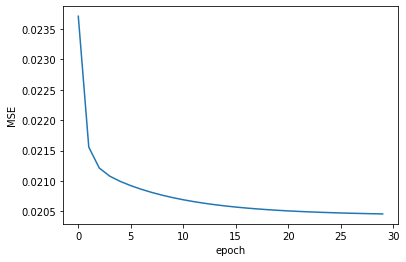

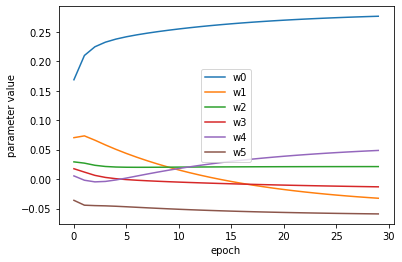

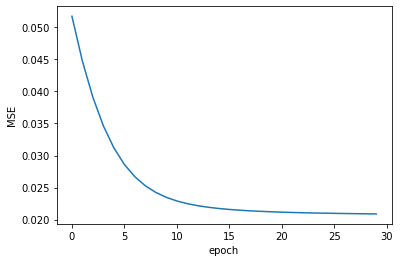

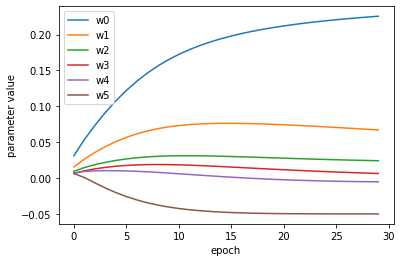

In [25]:
print('Using RMSprop :\n')

lowest_mse = np.Inf
best_reg = None
best_rate = None
second_lowest_mse = np.Inf
second_best_reg = None
second_best_rate = None

for rate in learning_rate:
  for lamb in regularization:
    lr = LinearRegression(rate, lamb, n_epochs)
    lr.fit(X, y)
    if lr.lowest_mse < lowest_mse:
      # first we will store previous best
      second_best_reg = best_reg
      second_best_rate = best_rate
      second_lowest_mse = lowest_mse
      # now, updating the best
      best_reg = lamb
      best_rate = rate
      lowest_mse = lr.lowest_mse

print('Best case is with learning rate : ',best_rate,' ,regularization : ', best_reg,' and #epochs : ', n_epochs)
lr = LinearRegression(best_rate, best_reg, n_epochs )
lr.fit(X, y, plot=True, update_rule='RMSprop')
print('Next best case is with learning rate : ',second_best_rate,' ,regularization : ', second_best_reg,' and #epochs : ', n_epochs)
lr = LinearRegression(second_best_rate, second_best_reg, n_epochs)
lr.fit(X, y, plot=True, update_rule='RMSprop')

#Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

Ans : Tanh as the activation function : Train loss is **0.156** and test loss is **0.175** <br>
Linear activation function : Train loss is **0.495** and test loss is **0.507** <br>
We see linear decision boundary with a linear activation function which obviously isn't suitable in cases where classification patterns get reversed post certain threshold of x. Any linear decision boundary wouldn't be able to score much better than 50% as is evident from the train-test losses from the linear activation function. Using tanh activation, we are able to impose a non-linearity and able to avail a better discriminat function to classify. Hence the loss reduces.


<br><br>

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

Ans : Using 4 neurons, we have test loss as 0.088 and train loss as 0.036 in default settings. Using 8 neurons, we have test loss as 0.021 and train as 0.006 implying improvement in performance. However, the improvement is not very high. Also the visualization showing the discriminat functions in the hidden layer show that a much more complex function is being used to create the decision boundary. This means it'll be a trade-off in terms of loss reduced vs complexity increase while deciding the number of neurons.

<br><br>
c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

\begin{array}{ccc}
\text{Eta}&\text{Epoch}&\text{Train}&\text{Test}\\
10&100&0.688&0.679\\
1&100&0.001&0.000\\0.1&100&0.272&0.295\\0.01&100&0.100&0.108\\0.001&100&0.307&0.321\\10&1000&0.928&1.056\\1&1000&0.242&0.247\\0.1&1000&0.000&0.019\\0.01&1000&0.016&0.013\\0.001&1000&0.044&0.055
\end{array}

We observe that more number of epochs are providing stable results compared to lesser epochs. Also as learning rate decreases we have test error improving. Ideally it would be preferrable to have higher number of epochs and lower learning rate, however this'll make the model too slow to search the error space and prone to overfitting.

<br><br>
d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

My approach was to first create a fully connected 6-hidden layer, 8 neuron in each layer model to observe if any neurons are ending up dead. What helps is leveraging all input space transformations especially X1X2 given target variable follows very similar pattern, creating first hidden layer to increase dimensionality in hopes for looking out for latent drivers and then reducing dimensionality in consequtive layers to reduce redundancy in terms of dead neurons. I also checked when weights associated with last hidden layer to output are discriminated well (blue vs orange), chances are we'd have a better classifier. 

Screenshot attached below!

We see with all input space, 6 hidden layers with #neurons being 8,5,4,3,2,2 respectively we see test loss dropping to 0.003


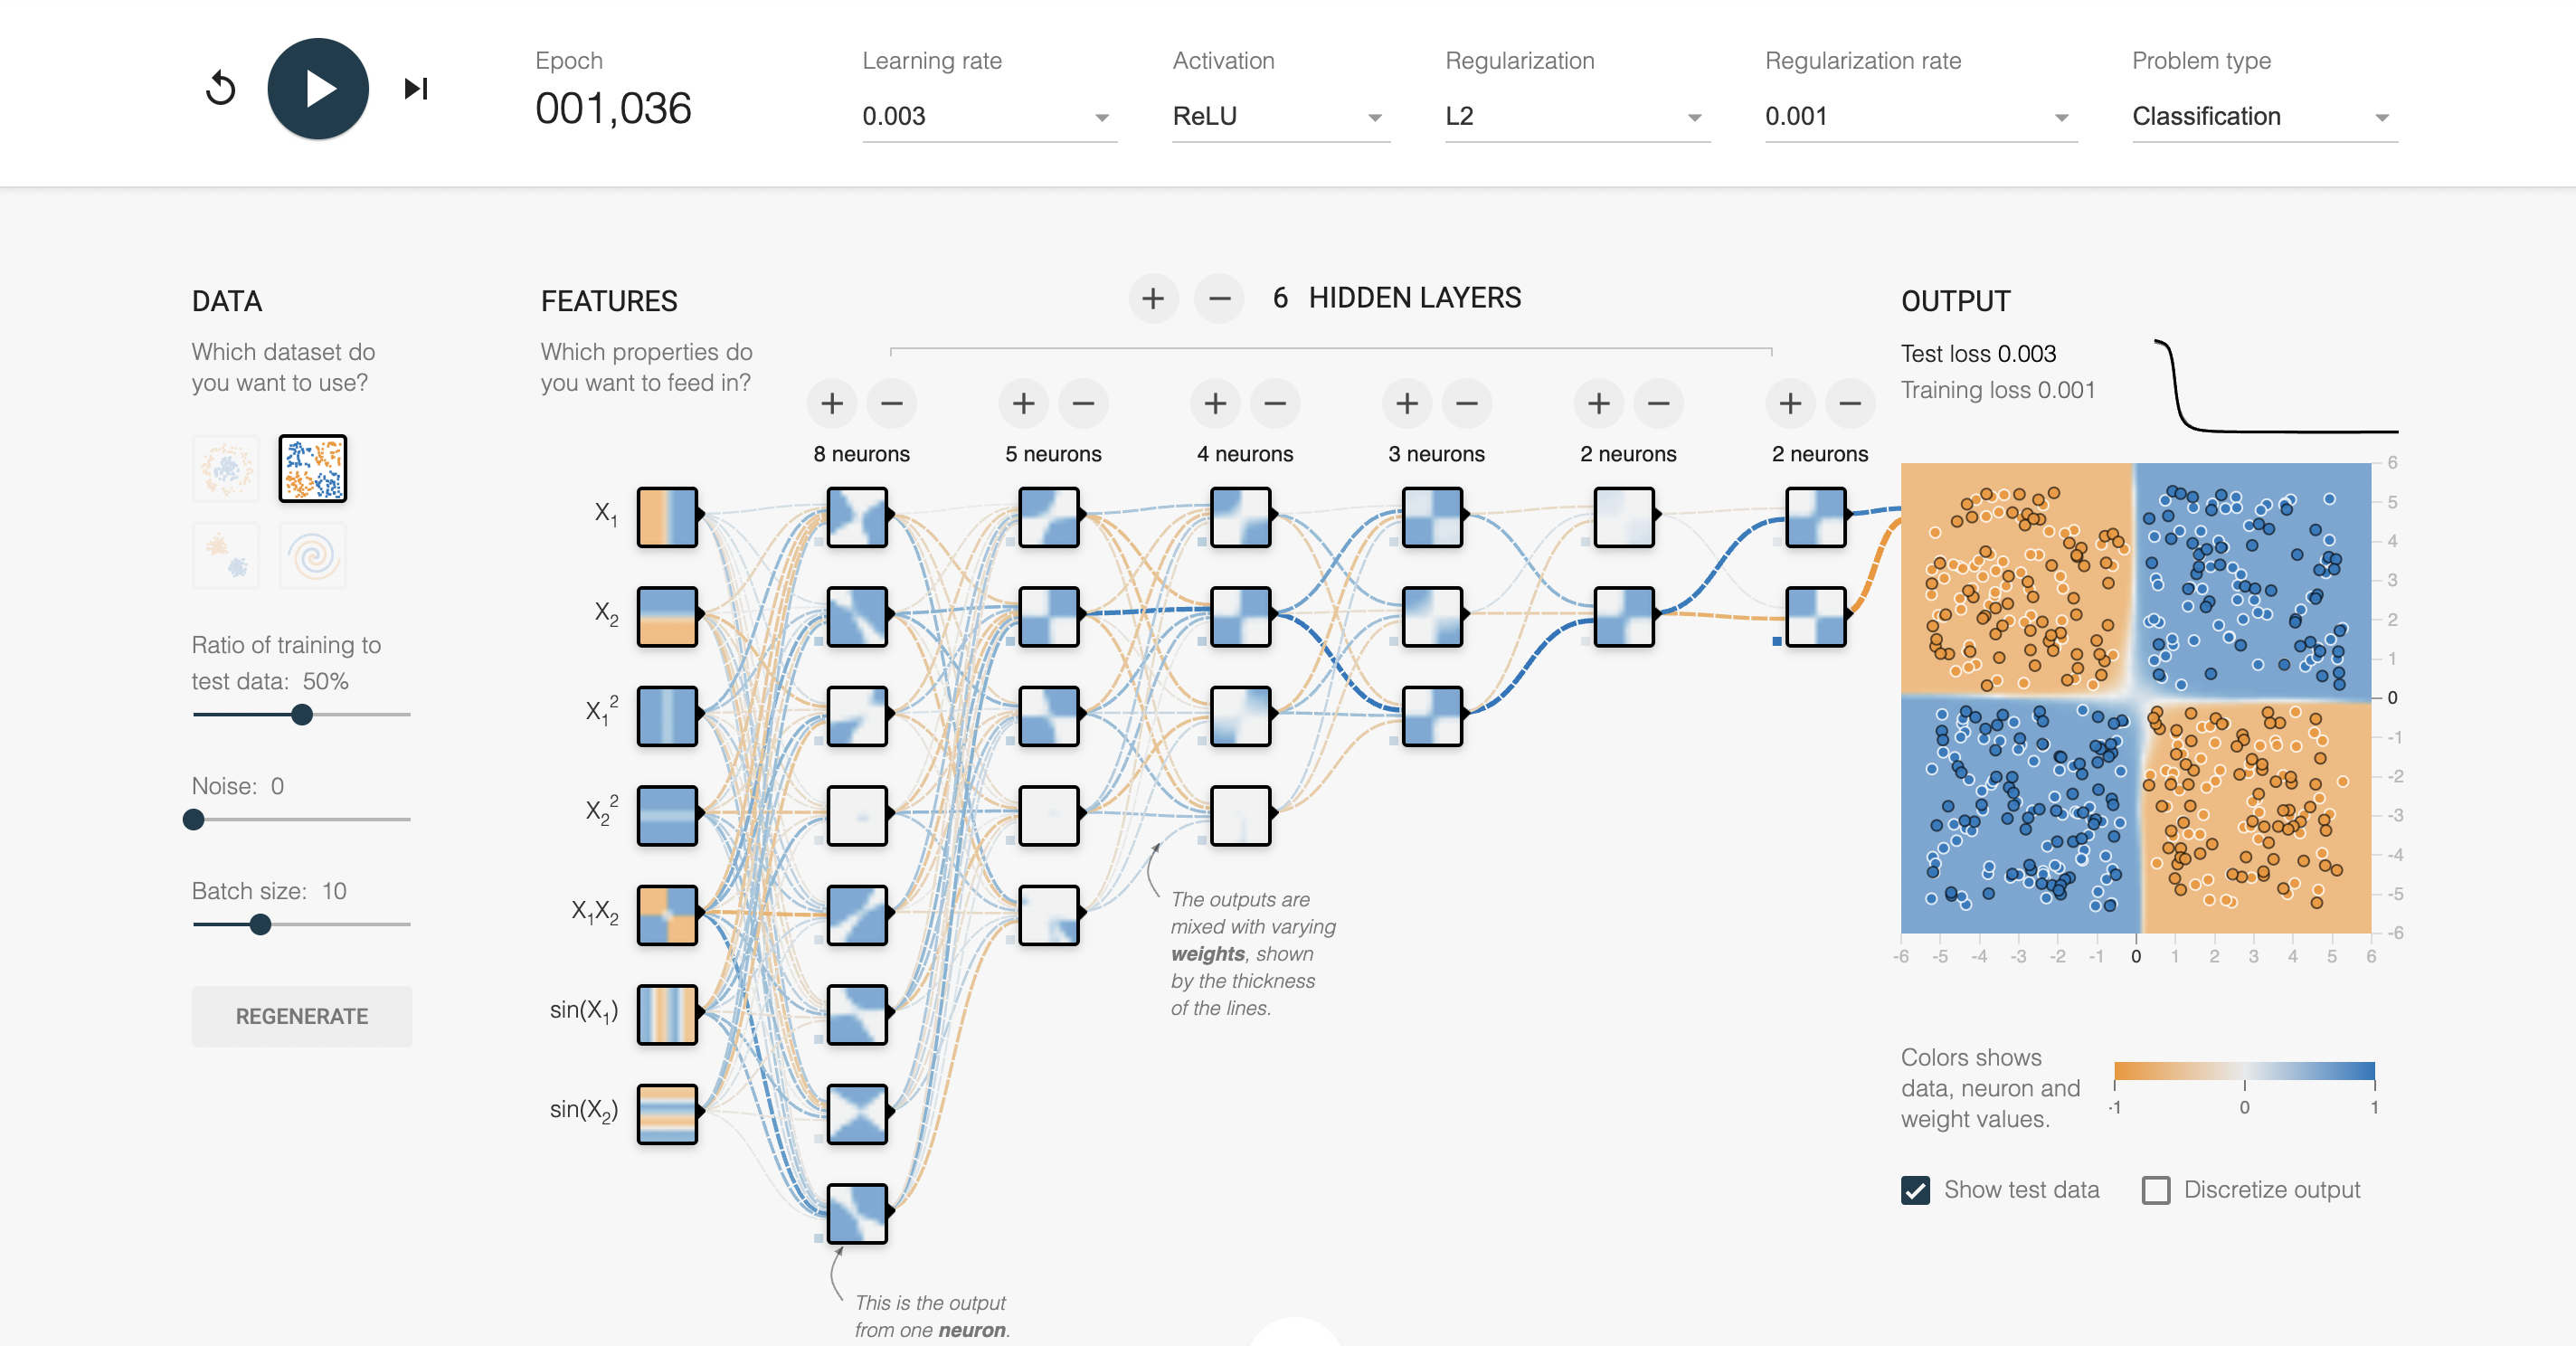

In [ ]:
import requests
import IPython.display as Disp
url = 'https://i.ibb.co/JRKMYXr/Screen-Shot-2021-10-17-at-1-05-40-AM.png'
#Image hosted on online server temporarily (1 month)
Disp.Image(requests.get(url).content)

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [ ]:
#!pip install pyod

In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
clf.fit(X_train)

# YOUR CODE SHOULD COME HERE

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results
test_outlier = clf.predict(X_test)
raw_outlier_score = clf.decision_function(X_test)
evaluate_print(clf,y = y_test , y_pred=raw_outlier_score)
# YOUR CODE SHOULD COME HERE

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


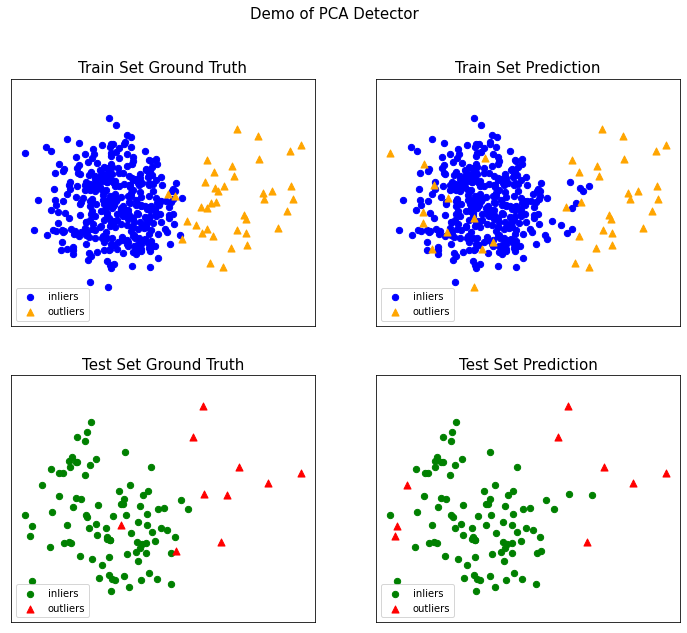

In [ ]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
# YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)
# YOUR CODE SHOULD COME HERE

#train_principalComponents

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

visualize("PCA", train_principalComponents, y_train,
          test_principalComponents, y_test, 
          clf.predict(X_train), test_outlier)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


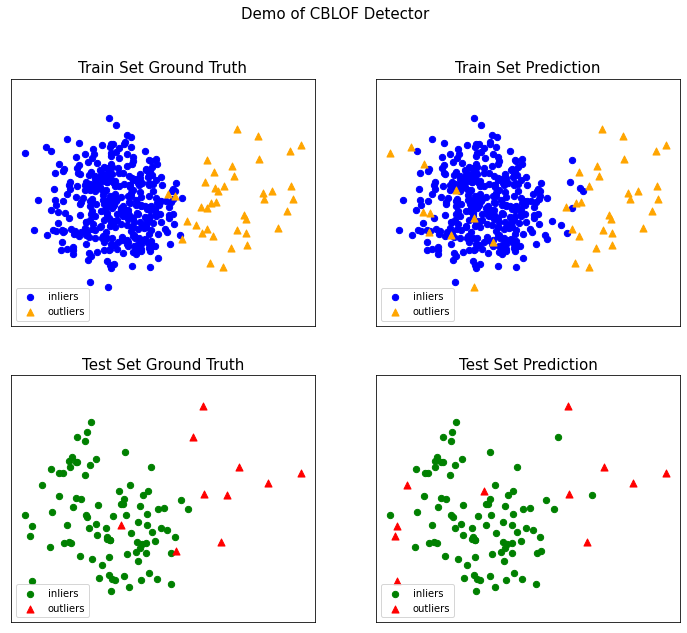

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

#Using Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)
clf = CBLOF()
clf.fit(X_train)
visualize("CBLOF", train_principalComponents, y_train,
          test_principalComponents, y_test, 
          clf.predict(X_train), clf.predict(X_test))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


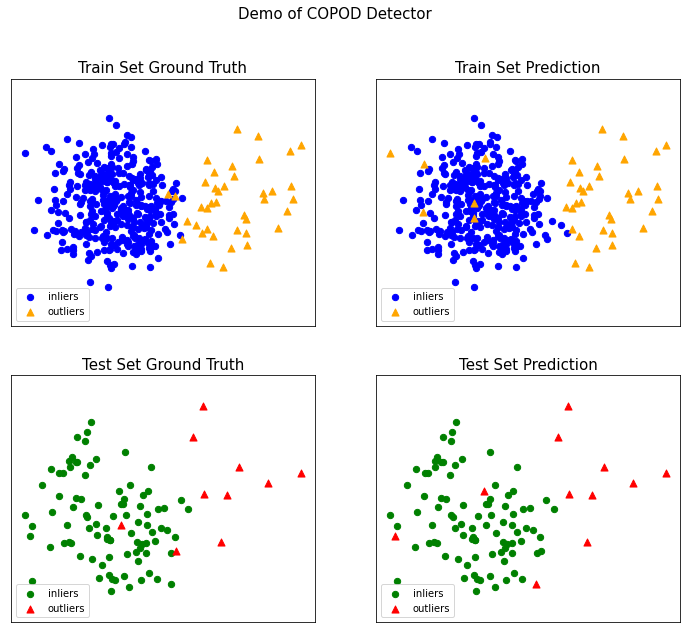

In [ ]:
#Probabilistic model - Copula-based Outlier Detection (COPOD)
clf = COPOD()

# fit the model using X_train
clf.fit(X_train)
visualize("COPOD", train_principalComponents, y_train,
          test_principalComponents, y_test, 
          clf.predict(X_train), clf.predict(X_test))

COPOD seems to be working better than CBLOF given it's making fewer obvious mistakes while qualifying datapoints having ground-truth as inliers to be outliers.

#Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:
Principal Component Analysis aims to reduce the dimensionality of the data without sacrificing too much information per se. The idea is say, we have a 1000-dimesion space on account of our data having 1000 columns. PCA attempts to explain the majority of information contained in these 1000 columns in a lower dimensional space. The plan is to be able to find the best 100 dimensional plane that upon taking projections from the 1000 dimensionals is still able to explain most of the variance in the data.

Why covariance matrix?
The information about original data can be explained in terms of the variance associated with each of the 1000 variables as well as the co-variance between all 1000C2 combinations of the variables, given real-world random variables often aren't independent of each other. Since PCA aims to compress the information in a 100 dimension space, the objective function of the optimization underlying would be to reduce the reconstruction loss. <br><br> Basically, minimize $$  Var(data_{original}) - Var(data_{reconstructed})$$

To achieve this we need to transform the axes that we use to define our data in such a manner that we greedily capture the most amount of variance possible, while also keeping each principal component orthogonal to the rest. This is why we need to start with identifying and  a dimension that explains the most amount of variance associated with the data(easy check with spread associated with the projections of all datapoints on the identified plane). The overall problem translates to 'diagonalizing' the covariance matrix which can be done by calculating the eigenvectors and eigenvalues of the same. The eigenvectors form the orthogonal transformed axes whereas the eigenvalues give out the proportion of variance being explained by each of the principal components.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
import copy
data_dm = copy.deepcopy(data)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000


In [ ]:
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'],include_lowest=True,bins=bins,labels=labels)

In [ ]:
data_dm = pd.get_dummies(data_dm, columns = ['binned_yr_built'])
data_dm.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built_1900-1920,binned_yr_built_1920-1940,binned_yr_built_1940-1960,binned_yr_built_1960-1980,binned_yr_built_1980-2000,binned_yr_built_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000,0,0,0,0,1,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
# yr_cols = [col for col in one_hot_encoded_data.columns if 'binned_yr_built_' in col]
# yr_cols
mask = (data_dm.isna().sum()/len(data_dm) <= 0.65)
mask

MSSubClass                    True
MSZoning                      True
LotFrontage                   True
LotArea                       True
Alley                        False
OverallQual                   True
OverallCond                   True
YearBuilt                     True
YearRemodAdd                  True
MasVnrArea                    True
ExterQual                     True
BsmtFinSF1                    True
BsmtFinSF2                    True
BsmtUnfSF                     True
TotalBsmtSF                   True
HeatingQC                     True
CentralAir                    True
Electrical                    True
1stFlrSF                      True
2ndFlrSF                      True
LowQualFinSF                  True
GrLivArea                     True
BsmtFullBath                  True
BsmtHalfBath                  True
FullBath                      True
HalfBath                      True
BedroomAbvGr                  True
KitchenAbvGr                  True
KitchenQual         

In [ ]:
data_dm[data_dm.columns[mask]].shape

(1460, 52)

In [ ]:
#We drop 4 columns
data_dm = data_dm[data_dm.columns[mask]]


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(6)
n=800
sample_ages = np.random.choice(a= data_dm['SalePrice'], size=800)
#Sample mean
print('Sample mean : ',np.mean(sample_ages)*((n-1)/n))

#Population mean
print('Population mean : ',np.mean(data_dm['SalePrice']))

print('Difference in mean : ',(np.mean(sample_ages)*((n-1)/n)) -  np.mean(data_dm['SalePrice']))

Sample mean :  178069.76546093752
Population mean :  180921.19589041095
Difference in mean :  -2851.430429473432


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()


import numpy as np
import scipy.stats

#Get the critical Z value
z_critical = stats.norm.ppf(0.975)
print('Critical Z value : ',z_critical)

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()
print('SE population : ',pop_stdev)

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print('Confidence Interval : ',confidence_interval)
print('Sample Mean : ',sample_mean)
print('True Mean : ',data_dm['SalePrice'].mean())


Critical Z value :  1.959963984540054
SE population :  79442.50288288663
Confidence Interval :  (166522.08555078227, 197662.97444921773)
Sample Mean :  182092.53
True Mean :  180921.19589041095


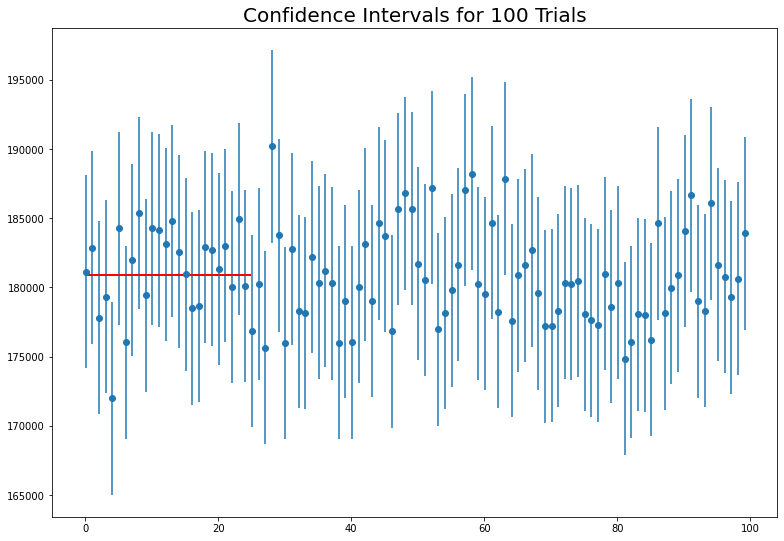

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = stats.norm.ppf(0.975)

    # compute population standard deviation  
    pop_stdev = data_dm['SalePrice'].std()  
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()